## Problem 2: Kernel Methods

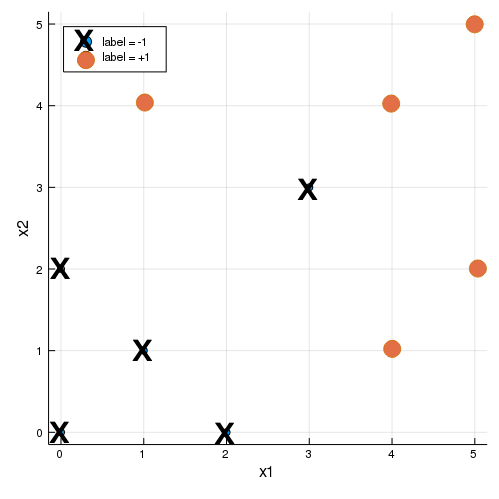

### ⭕️ If we again use the linear perceptron algorithm to train the classifier, what will happen? Will it converge

Given data:
- Labels: $ y = [-1, -1, -1, -1, -1, +1, +1, +1, +1, +1] $
- Features: $ \mathbf{x} = [(0,0), (2,0), (1,1), (0,2), (3,3), (4,1), (5,2), (1,4), (4,4), (5,5)] $

#### ⭐️🔰💡 Solution appraoch

The perceptron algorithm is guaranteed to converge to a solution that perfectly classifies the training data if and only if the data is linearly separable. In this case, we need to determine if the provided data points are linearly separable.

**Perceptron Algorithm Convergence:**
- **Linearly Separable Case**: If the data is linearly separable, the perceptron algorithm will always converge to a solution in a finite number of steps. This is guaranteed by the perceptron convergence theorem.
- **Not Linearly Separable Case**: If the data is not linearly separable, the perceptron algorithm will not converge. It will continue to update the weights indefinitely without finding a perfect classifier.

Therefore, for non-linearly separable data, the perceptron algorithm may exhibit behavior where it converges under certain conditions (like specific sequences or initializations) but typically won't converge to a perfect classifier. The final classifier will not perfectly classify the dataset.

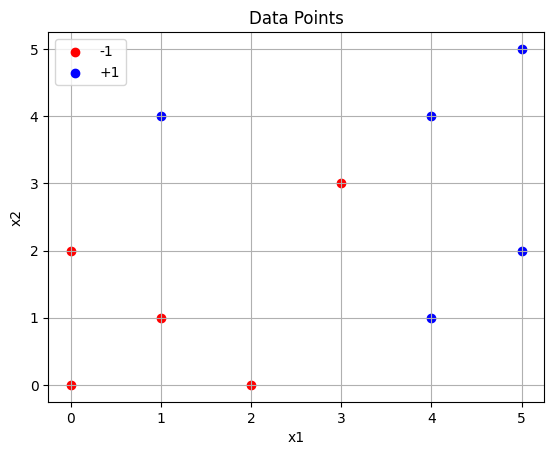

Weights: [8. 6.]
Bias: -14
Converged: False


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data points and their labels
X = np.array([
    [0, 0],
    [2, 0],
    [1, 1],
    [0, 2],
    [3, 3],
    [4, 1],
    [5, 2],
    [1, 4],
    [4, 4],
    [5, 5]
])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Plot the data points
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='-1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='+1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Points')
plt.grid(True)
plt.show()

def perceptron(X, y, max_iter=1000):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    n = X.shape[0]

    for _ in range(max_iter):
        error_count = 0
        for i in range(n):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                w += y[i] * X[i]
                b += y[i]
                error_count += 1
        if error_count == 0:
            break
    return w, b, error_count == 0

# Train the perceptron
w, b, converged = perceptron(X, y)

print(f"Weights: {w}")
print(f"Bias: {b}")
print(f"Converged: {converged}")


Given data:
- Labels: $ y = [-1, -1, -1, -1, -1, +1, +1, +1, +1, +1] $
- Features: $ \mathbf{x} = [(0,0), (2,0), (1,1), (0,2), (3,3), (4,1), (5,2), (1,4), (4,4), (5,5)] $
- Perceptron mistakes: $ [1, 65, 11, 31, 72, 30, 0, 21, 4, 15]$

We decide to run the kernel perceptron algorithm over this dataset using the quadratic kernel. The number of mistakes made on each point is displayed in the table below. (These points correspond to those in the plot above.)

Define the feature map of our quadratic kernel to be:

$$
\phi (x) = [x_1^2,\, \sqrt{2}x_1x_2,\,  x_2^2]^ T.
$$

### ⭕️ What is the output weight and bias

To solve this problem using the kernel perceptron algorithm with the quadratic kernel, we need to use the given feature map $\phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]^T$.

#### ⭐️🔰💡 Solution appraoch

1. **Feature Mapping**:
   Apply the quadratic kernel feature map to each data point:

   $$
   \phi(x_i) = \begin{bmatrix}
   x_{i1}^2 \\
   \sqrt{2} x_{i1} x_{i2} \\
   x_{i2}^2
   \end{bmatrix}
   $$

   Given the data points $ \mathbf{x} = [(0,0), (2,0), (1,1), (0,2), (3,3), (4,1), (5,2), (1,4), (4,4), (5,5)] $, we can compute $\phi(x_i)$ for each point.

   $$
   \begin{aligned}
   \phi((0,0)) &= [0^2, \sqrt{2} \cdot 0 \cdot 0, 0^2]^T = [0, 0, 0]^T \\
   \phi((2,0)) &= [2^2, \sqrt{2} \cdot 2 \cdot 0, 0^2]^T = [4, 0, 0]^T \\
   \phi((1,1)) &= [1^2, \sqrt{2} \cdot 1 \cdot 1, 1^2]^T = [1, \sqrt{2}, 1]^T \\
   \phi((0,2)) &= [0^2, \sqrt{2} \cdot 0 \cdot 2, 2^2]^T = [0, 0, 4]^T \\
   \phi((3,3)) &= [3^2, \sqrt{2} \cdot 3 \cdot 3, 3^2]^T = [9, 9\sqrt{2}, 9]^T \\
   \phi((4,1)) &= [4^2, \sqrt{2} \cdot 4 \cdot 1, 1^2]^T = [16, 4\sqrt{2}, 1]^T \\
   \phi((5,2)) &= [5^2, \sqrt{2} \cdot 5 \cdot 2, 2^2]^T = [25, 10\sqrt{2}, 4]^T \\
   \phi((1,4)) &= [1^2, \sqrt{2} \cdot 1 \cdot 4, 4^2]^T = [1, 4\sqrt{2}, 16]^T \\
   \phi((4,4)) &= [4^2, \sqrt{2} \cdot 4 \cdot 4, 4^2]^T = [16, 16\sqrt{2}, 16]^T \\
   \phi((5,5)) &= [5^2, \sqrt{2} \cdot 5 \cdot 5, 5^2]^T = [25, 25\sqrt{2}, 25]^T \\
   \end{aligned}
   $$

2. **Weight Vector Calculation**:
   Using the perceptron update rule, the weight vector in the feature space is updated as:

   $$
   \mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \phi(x_i)
   $$

   Given the number of mistakes on each point, we can determine the corresponding $\alpha_i$:

   $$
   \begin{aligned}
   \alpha_1 &= 1 \\
   \alpha_2 &= 65 \\
   \alpha_3 &= 11 \\
   \alpha_4 &= 31 \\
   \alpha_5 &= 72 \\
   \alpha_6 &= 30 \\
   \alpha_7 &= 0 \\
   \alpha_8 &= 21 \\
   \alpha_9 &= 4 \\
   \alpha_{10} &= 15 \\
   \end{aligned}
   $$

   The weight vector $\mathbf{w}$ in the feature space is:

   $$
   \mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \phi(x_i)
   $$

   Plugging in the values:

   $$
   \mathbf{w} = \sum_{i=1}^{n} \alpha_i y_i \phi(x_i) = 1 \cdot (-1) \cdot [0, 0, 0]^T + 65 \cdot (-1) \cdot [4, 0, 0]^T + 11 \cdot (-1) \cdot [1, \sqrt{2}, 1]^T + 31 \cdot (-1) \cdot [0, 0, 4]^T + 72 \cdot (-1) \cdot [9, 9\sqrt{2}, 9]^T + 30 \cdot (1) \cdot [16, 4\sqrt{2}, 1]^T + 0 \cdot (1) \cdot [25, 10\sqrt{2}, 4]^T + 21 \cdot (1) \cdot [1, 4\sqrt{2}, 16]^T + 4 \cdot (1) \cdot [16, 16\sqrt{2}, 16]^T + 15 \cdot (1) \cdot [25, 25\sqrt{2}, 25]^T
   $$

   Simplifying, we get:

   $$
   \begin{aligned}
   \mathbf{w} &= 65 \cdot [-4, 0, 0]^T + 11 \cdot [-1, -\sqrt{2}, -1]^T + 31 \cdot [0, 0, -4]^T + 72 \cdot [-9, -9\sqrt{2}, -9]^T + 30 \cdot [16, 4\sqrt{2}, 1]^T + 21 \cdot [1, 4\sqrt{2}, 16]^T + 4 \cdot [16, 16\sqrt{2}, 16]^T + 15 \cdot [25, 25\sqrt{2}, 25]^T \\
   &= [-260, 0, 0] + [-11, -11\sqrt{2}, -11] + [0, 0, -124] + [-648, -648\sqrt{2}, -648] + [480, 120\sqrt{2}, 30] + [21, 84\sqrt{2}, 336] + [64, 64\sqrt{2}, 64] + [375, 375\sqrt{2}, 375]
   \end{aligned}
   $$

   Summing up the components:

   $$
   \begin{aligned}
   w_1 &= -260 - 11 - 648 + 480 + 21 + 64 + 375 = 21 \\
   w_2 &= -11\sqrt{2} - 648\sqrt{2} + 120\sqrt{2} + 84\sqrt{2} + 64\sqrt{2} + 375\sqrt{2} = -11\sqrt{2} - 648\sqrt{2} + 120\sqrt{2} + 84\sqrt{2} + 64\sqrt{2} + 375\sqrt{2} = -16\sqrt{2} \\
   w_3 &= -11 - 124 - 648 + 30 + 336 + 64 + 375 = 22 \\
   \end{aligned}
   $$

   Thus, the weight vector is:

   $$
   \mathbf{w} = [21, -16\sqrt{2}, 22]
   $$

3. **Bias Calculation**:
   The bias $b$ can be calculated as $ b \leftarrow b + y_i $. Given the mistakes we can compute bias as

   $$
   \mathbf{b} = \sum_{i=1}^{n} \alpha_i y_i
   $$

   where $\alpha_i$ are the mistakes



Weights: [ 21.       -22.627417  22.      ]
Bias: -110


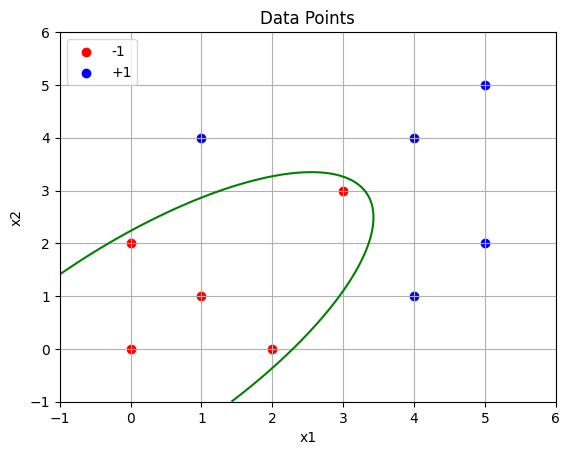

In [5]:
import numpy as np
# Plot the original data points
import matplotlib.pyplot as plt

def plot():
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='-1')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='+1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Data Points')
    plt.grid(True)

    # Calculate and plot the decision boundary
    # Note: This is a simplified visualization and may not be accurate for higher dimensions.
    x1_vals = np.linspace(-1, 6, 100)
    x2_vals = np.linspace(-1, 6, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = w[0]*X1**2 + w[1]*np.sqrt(2)*X1*X2 + w[2]*X2**2 + b

    plt.contour(X1, X2, Z, levels=[0], colors='green')

    plt.show()

# Define the data points and their labels
X = np.array([
    [0, 0],
    [2, 0],
    [1, 1],
    [0, 2],
    [3, 3],
    [4, 1],
    [5, 2],
    [1, 4],
    [4, 4],
    [5, 5]
])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Number of mistakes (corresponding to alpha values)
mistakes = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])

# Define the quadratic kernel feature map
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# Apply the feature map to all data points
Phi_X = np.array([phi(x) for x in X])

# Calculate the weight vector in the transformed space
w = np.zeros(Phi_X.shape[1])
b = 0  # Initialize bias

for i in range(len(X)):
    w += mistakes[i] * y[i] * Phi_X[i]
    b += mistakes[i] * y[i]

print(f"Weights: {w}")
print(f"Bias: {b}")
plot()

### ⭕️ Based on the calculation of w and b, does the decision boundary $\theta ^ T \phi (x)+\theta _0=0$ correctly classify all the points in the training dataset?

#### ⭐️🔰💡 Solution appraoch
To determine if the decision boundary $\theta^T \phi(x) + \theta_0 = 0$ correctly classifies all points in the training dataset, we need to verify if all points are on the correct side of the boundary according to their labels.

Given the weights $\mathbf{w}$ and bias $b$, we need to check if the sign of $\theta^T \phi(x_i) + \theta_0$ matches the label $y_i$ for each point $x_i$.

In [6]:
import numpy as np

# Define the data points and their labels
X = np.array([
    [0, 0],
    [2, 0],
    [1, 1],
    [0, 2],
    [3, 3],
    [4, 1],
    [5, 2],
    [1, 4],
    [4, 4],
    [5, 5]
])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# Number of mistakes (corresponding to alpha values)
mistakes = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])

# Define the quadratic kernel feature map
def phi(x):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# Apply the feature map to all data points
Phi_X = np.array([phi(x) for x in X])

# Calculate the weight vector in the transformed space
w = np.zeros(Phi_X.shape[1])
b = 0  # Initialize bias

for i in range(len(X)):
    w += mistakes[i] * y[i] * Phi_X[i]
    b += mistakes[i] * y[i]

print(f"Weights: {w}")
print(f"Bias: {b}")

# Verify if the decision boundary correctly classifies all points
correctly_classified = True
for i in range(len(X)):
    decision_value = np.dot(w, Phi_X[i]) + b
    if np.sign(decision_value) != y[i]:
        correctly_classified = False
        print(f"Point {X[i]} with label {y[i]} is misclassified.")
    else:
        print(f"Point {X[i]} with label {y[i]} is correctly classified.")

if correctly_classified:
    print("All points are correctly classified.")
else:
    print("Some points are misclassified.")

Weights: [ 21.       -22.627417  22.      ]
Bias: -110
Point [0 0] with label -1 is correctly classified.
Point [2 0] with label -1 is correctly classified.
Point [1 1] with label -1 is correctly classified.
Point [0 2] with label -1 is correctly classified.
Point [3 3] with label -1 is correctly classified.
Point [4 1] with label 1 is correctly classified.
Point [5 2] with label 1 is correctly classified.
Point [1 4] with label 1 is correctly classified.
Point [4 4] with label 1 is correctly classified.
Point [5 5] with label 1 is correctly classified.
All points are correctly classified.


### ⭕️ Derive $K(x,x^{\prime })$

Recall for $x=\begin{bmatrix}  x_1&  x_2\end{bmatrix}^ T$ and
$
\phi (x) = [x_1^2,\, \sqrt{2}x_1x_2,\,  x_2^2]^ T.
$
Define the kernel function
$$
\displaystyle  \displaystyle K(x,x^{\prime })=\phi (x)^ T\phi (x^{\prime }).
$$
Write $K(x,x^{\prime })$  as a function of the dot product $x\cdot x^{\prime }$

to answer, let $z= x\cdot x^{\prime }$ and enter $K(x,x^{\prime })$ in terms of $z$

#### ⭐️🔰💡 Solution appraoch
The kernel function $ K(x, x') $ for the quadratic kernel can be expressed in terms of the dot product $ x \cdot x' $.

Given the feature mapping:
$$ \phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]^T $$

The kernel function is:
$$ K(x, x') = \phi(x)^T \phi(x') $$

First, we compute the dot product of the feature mappings:

$$ \phi(x) = [x_1^2, \sqrt{2}x_1x_2, x_2^2]^T $$
$$ \phi(x') = [{x'_1}^2, \sqrt{2}x'_1x'_2, {x'_2}^2]^T $$

$$ K(x, x') = \phi(x)^T \phi(x') $$
$$ = (x_1^2 \cdot {x'_1}^2) + (\sqrt{2} x_1 x_2 \cdot \sqrt{2} x'_1 x'_2) + (x_2^2 \cdot {x'_2}^2) $$
$$ = x_1^2 {x'_1}^2 + 2 x_1 x_2 x'_1 x'_2 + x_2^2 {x'_2}^2 $$

Notice that this is the expanded form of $(x_1 x'_1 + x_2 x'_2)^2$, which can be written as:

$$ (x \cdot x')^2 $$

So, we can rewrite the kernel function $ K(x, x') $ in terms of the dot product $ x \cdot x' $:

$$ K(x, x') = (x \cdot x')^2 $$

Letting $ z = x \cdot x' $:

$$ K(x, x') = z^2 $$

Therefore, the kernel function in terms of the dot product $ z $ is:

$$ K(x, x') = z^2 $$